# General problem and Goal.

General problem and Goal.

A winery wants to optimize their business and improve quality assurance by DS & ML solution. The ultimate goal is to fire all sommeliers and replace them by a series of chemical tests. Currently sommeliers marks a reused for wine marketing and distribution to distinguish elite wines out of average and poor ones regardless of region and year of production. 
Goal - provide a system to automatically assess the wine quality.

Main aspects and plan resolving business problems.

This task needs a classification approach. Since on input, we have some chemical characteristics then output we need to have a wine class which the predict ML model. Since we have several classifications classes we need a score that will satisfy the business goal. For this project will choose f1 score. The f1 score can be interpreted as a weighted average of the precision and recall, where an f1 score reaches its best value at 1 and worst score of 0. Also will build confusion matrix.

# Data Understanding


##  Importing library 

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("cubehelix", 9)
from scipy.stats import f_oneway
import pylab 
import scipy.stats as stats
import statsmodels.api as sm
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import random
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn import preprocessing
from scipy.stats import chi2
from mpl_toolkits.mplot3d import Axes3D

from imblearn.combine import SMOTETomek
from imblearn.under_sampling import OneSidedSelection

import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


## General statistical characteries

In [2]:
# Read data

# Data for analysis, aggregation, EDA
data = pd.read_csv('WINE.csv', index_col = 'Index')
data_test = pd.read_csv('TEST.csv', index_col = 'Index')

In [3]:
# Show type and nan values feature
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5600 entries, 0 to 5599
Data columns (total 17 columns):
Target      5600 non-null int64
Type        5600 non-null object
Alcohol     5600 non-null float64
Density     5600 non-null float64
Nitrogen    5600 non-null float64
pH          5600 non-null float64
Sugar       5600 non-null float64
A           5567 non-null float64
B           5600 non-null float64
C           5600 non-null float64
D           5600 non-null float64
Di          5600 non-null float64
E           5600 non-null float64
H           5584 non-null float64
S           5600 non-null float64
U           5600 non-null float64
V           5600 non-null float64
dtypes: float64(15), int64(1), object(1)
memory usage: 787.5+ KB


In [4]:
# Show general statistical characteries
data.describe()

,Target,Alcohol,Density,Nitrogen,pH,Sugar,A,B,C,D,Di,E,H,S,U,V
count,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.00000,5567.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5584.000000,5600.000000,5600.000000,5600.000000
mean,3.812143,8.337791,1.039718,5.250179,3.427979,5.59803,24.539752,3.421562,4.776455,32.608714,43.709220,1.366580,2.909697,4.544402,5.516623,0.145773
std,0.864077,0.591844,0.457331,3.698764,0.165377,4.54153,2.573420,2.155710,2.170485,19.532201,20.156748,0.349658,2.121635,2.174807,2.820828,0.094536
min,1.000000,7.100000,1.010000,0.000000,2.910000,0.97000,17.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,7.850000,1.010000,2.740000,3.320000,2.11000,22.900000,1.980000,3.750000,17.600000,28.780000,1.130000,1.800000,3.070000,3.650000,0.070000
50%,4.000000,8.250000,1.020000,4.450000,3.420000,3.25000,24.100000,2.770000,4.650000,30.800000,41.695000,1.360000,2.360000,4.230000,5.650000,0.140000
75%,4.000000,8.750000,1.020000,6.860000,3.530000,8.19000,25.500000,4.220000,5.850000,45.100000,56.120000,1.600000,3.470000,5.550000,7.500000,0.210000
max,6.000000,10.550000,10.210000,30.720000,4.240000,62.91000,41.900000,16.500000,24.900000,316.800000,318.220000,2.600000,37.260000,25.990000,21.700000,0.520000


Table shows that several features has too large difference max and min values. So will try understand character this differences. Show boxplot visualisation for detection outliers.

## Boxplot visualizations

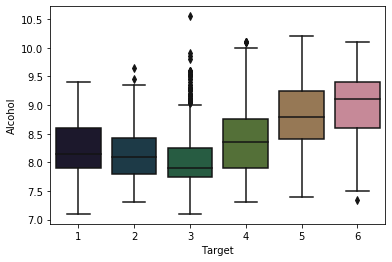

In [5]:
# Show boxplot visualisation for detection outliers
sns.boxplot(x="Target", y="Alcohol", data=data)

Alcohol data has a outliers in 2, 3(more outliers), 4, 6 Classes.

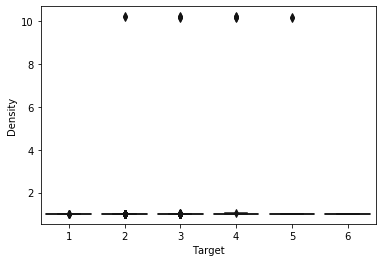

In [6]:
sns.boxplot(x="Target", y="Density", data=data)

Density data has a huge outliers in 2, 3, 4, 5 Classes. Data need cleaning and repit boxpliting.

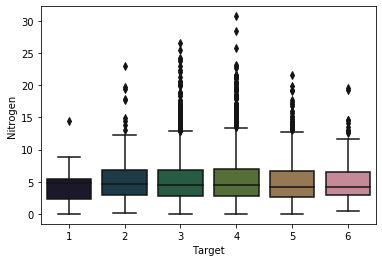

In [7]:
sns.boxplot(x="Target", y="Nitrogen", data=data)

Nitrogen data has a outliers in all Classes. This feature may be not included, because has approximately equivalent median for all Targets.

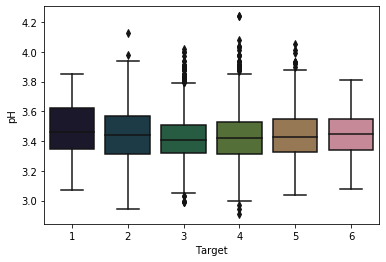

In [8]:
sns.boxplot(x="Target", y="pH", data=data)

pH data has a outliers in 2, 3, 4, 5 Classes. Data need cleaning and repit boxpliting.

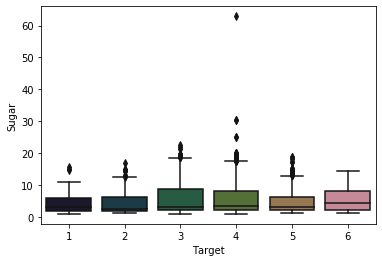

In [9]:
sns.boxplot(x="Target", y="Sugar", data=data)

Sugar data has a outliers in 1, 2, 3, 4, 5 Classes. Data need cleaning and repit boxpliting.

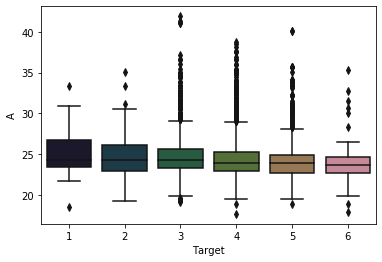

In [10]:
sns.boxplot(x="Target", y="A", data=data)

This feature may be not included, because has approximately equivalent median for all Targets.

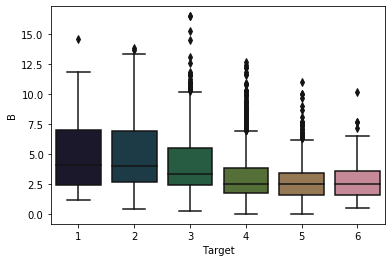

In [11]:
sns.boxplot(x="Target", y="B", data=data)

B data has a outliers in all Classes

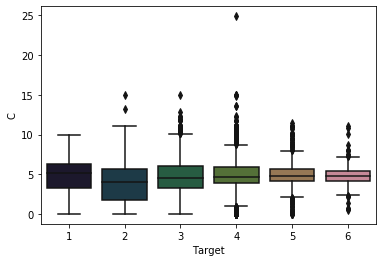

In [12]:
sns.boxplot(x="Target", y="C", data=data)

C data has a outliers in 2, 3, 4, 5, 6 Classes. Data need cleaning and repit boxpliting.

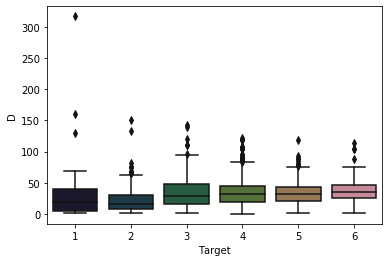

In [13]:
sns.boxplot(x="Target", y="D", data=data)

D data has a outliers in all Classes. Data need cleaning and repit boxpliting.

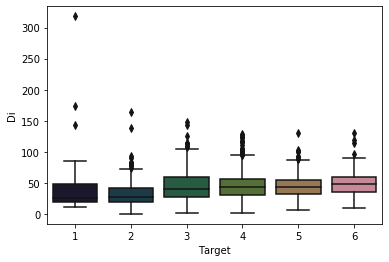

In [14]:
sns.boxplot(x="Target", y="Di", data=data)

Di data has a outliers in all Classes

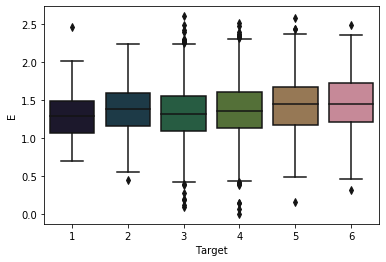

In [15]:
sns.boxplot(x="Target", y="E", data=data)

E data has a outliers in all Classes. Data need cleaning and repit boxpliting.

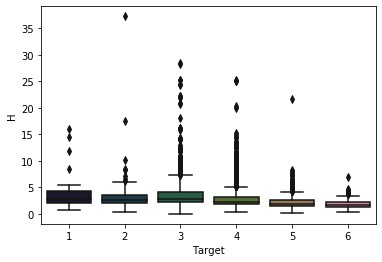

In [16]:
sns.boxplot(x="Target", y="H", data=data)

H data has a outliers in all Classes. Data need cleaning and repit boxpliting.

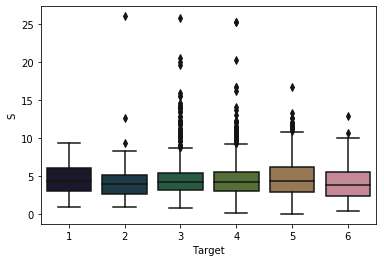

In [17]:
sns.boxplot(x="Target", y="S", data=data)

S data has a outliers in 2, 3, 4, 5, 6 Classes. This feature may be not included, because has approximately equivalent median for all Targets.

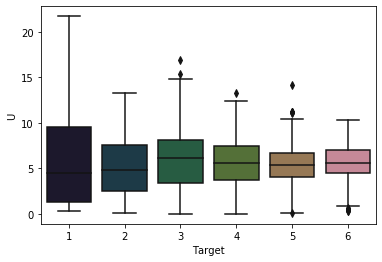

In [18]:
sns.boxplot(x="Target", y="U", data=data)

U data has a outliers in 3, 5, 6 Classes. 

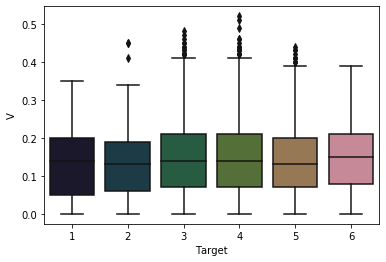

In [19]:
sns.boxplot(x="Target", y="V", data=data)

V data has a outliers in 2, 3, 4, 5 Classes. This feature may be not included, because has approximately equivalent median for all Targets.

## Detecting and deleting outliers

Next step is deleting outliers and repeating boxplot analysis

In [20]:
def outlier_hunt(my_data):

    # Detect and replace the outliers

    mean_data = np.nanmean(my_data, axis=0)
    Q1 = my_data.quantile(0.25)
    Q3 = my_data.quantile(0.75)
    IQR = (Q3 - Q1)*1.5
    index_detect_1 = np.where(my_data < Q1 - IQR)
    index_detect_2 = np.where(my_data > Q3 + IQR)
    index = np.concatenate((index_detect_1, index_detect_2), axis=1)
    for i in index:
        my_data[i] = mean_data
    return my_data

In [21]:
# Data without Type
features_without_Type = ['Alcohol', 'Density', 'pH','Sugar','B', 'C', 'D',  'Di', 'E', 'H', 'U']
for feature in features_without_Type:
    # Deleting outliers
    data[feature] = outlier_hunt(data[feature])

Repeat boxplot for features such as Density, Sugar, C, D, E, H

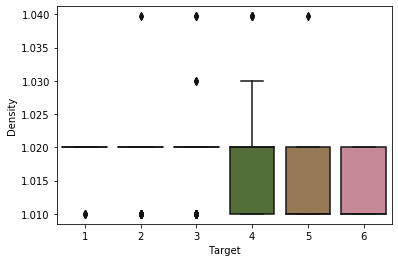

In [22]:
sns.boxplot(x="Target", y="Density", data=data)

Density feature may be unincluded. Feature has approximately equivalent median for all Targets

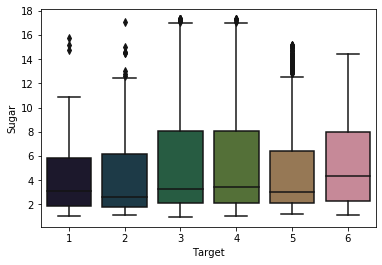

In [23]:
sns.boxplot(x="Target", y="Sugar", data=data)

Sugar feature may be included for next modeling

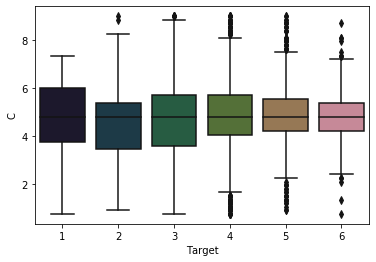

In [24]:
sns.boxplot(x="Target", y="C", data=data)

C feature may be unincluded. Feature has approximately equivalent median for all Targets

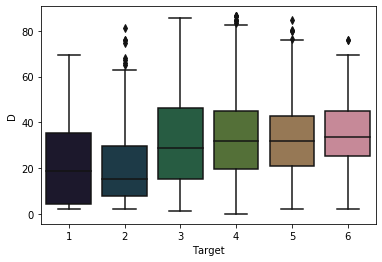

In [25]:
sns.boxplot(x="Target", y="D", data=data)

D feature may be included for next modeling

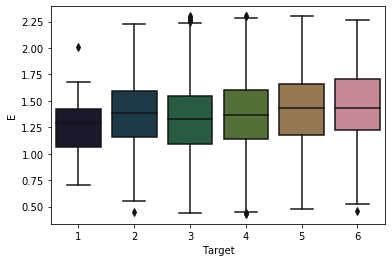

In [26]:
sns.boxplot(x="Target", y="E", data=data)

E feature may be included for next modeling

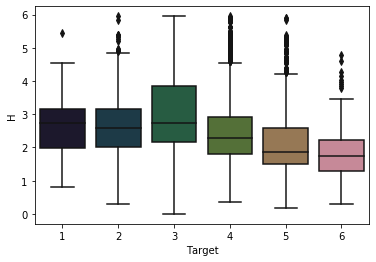

In [27]:
sns.boxplot(x="Target", y="H", data=data)

H feature may be included for next modeling

## Correlation

In [28]:
# Show correlation
corr = data.corr()
corr.style.background_gradient()

,Target,Alcohol,Density,Nitrogen,pH,Sugar,A,B,C,D,Di,E,H,S,U,V
Target,1,0.443796,-0.29665,-0.020498,0.0199895,-0.0199611,-0.0846169,-0.208097,0.0786371,0.0756409,0.0745725,0.0855325,-0.256317,0.0329892,-0.034088,-0.0246339
Alcohol,0.443796,1,-0.605281,-0.00905307,0.113518,-0.348746,-0.106056,-0.0139488,0.0217265,-0.18502,-0.174285,0.189632,-0.331082,-0.012727,-0.270081,0.0104528
Density,-0.29665,-0.605281,1,0.0578354,0.0588665,0.37715,0.30557,0.212288,0.00352771,0.0107981,0.00225289,-0.119087,0.479146,0.205518,0.0175216,0.11859
Nitrogen,-0.020498,-0.00905307,0.0578354,1,0.0647302,-0.0759862,0.074699,0.11407,-0.0216374,-0.069393,-0.0699337,-0.00752659,0.13023,0.0817303,-0.119655,0.0871173
pH,0.0199895,0.113518,0.0588665,0.0647302,1,-0.259295,-0.224309,0.183549,-0.201512,-0.153367,-0.152904,0.00763816,0.215158,0.1868,-0.243964,0.105109
Sugar,-0.0199611,-0.348746,0.37715,-0.0759862,-0.259295,1,-0.117509,-0.160756,0.0620612,0.43467,0.416288,-0.0460244,-0.150488,-0.181308,0.49909,-0.13148
A,-0.0846169,-0.106056,0.30557,0.074699,-0.224309,-0.117509,1,0.211361,0.28863,-0.297623,-0.288971,-0.00371591,0.427325,0.301517,-0.336532,0.186258
B,-0.208097,-0.0139488,0.212288,0.11407,0.183549,-0.160756,0.211361,1,-0.217314,-0.314951,-0.304291,0.00668356,0.443321,0.227644,-0.33778,0.214892
C,0.0786371,0.0217265,0.00352771,-0.0216374,-0.201512,0.0620612,0.28863,-0.217314,1,0.0987255,0.090088,0.0234088,-0.0683825,0.0815629,0.0914849,-0.0258583
D,0.0756409,-0.18502,0.0107981,-0.069393,-0.153367,0.43467,-0.297623,-0.314951,0.0987255,1,0.953298,-0.0228161,-0.303296,-0.200084,0.723146,-0.168808


Need delete features with large(>0.95) correlation. In this case need delete D or Di feature.

In [29]:
feature_list = ['Target', 'Alcohol', 'pH', 'Sugar', 'B', 'D', 'E', 'H', 'U']
data_analysis = data.loc[:, feature_list]

## Pairplot

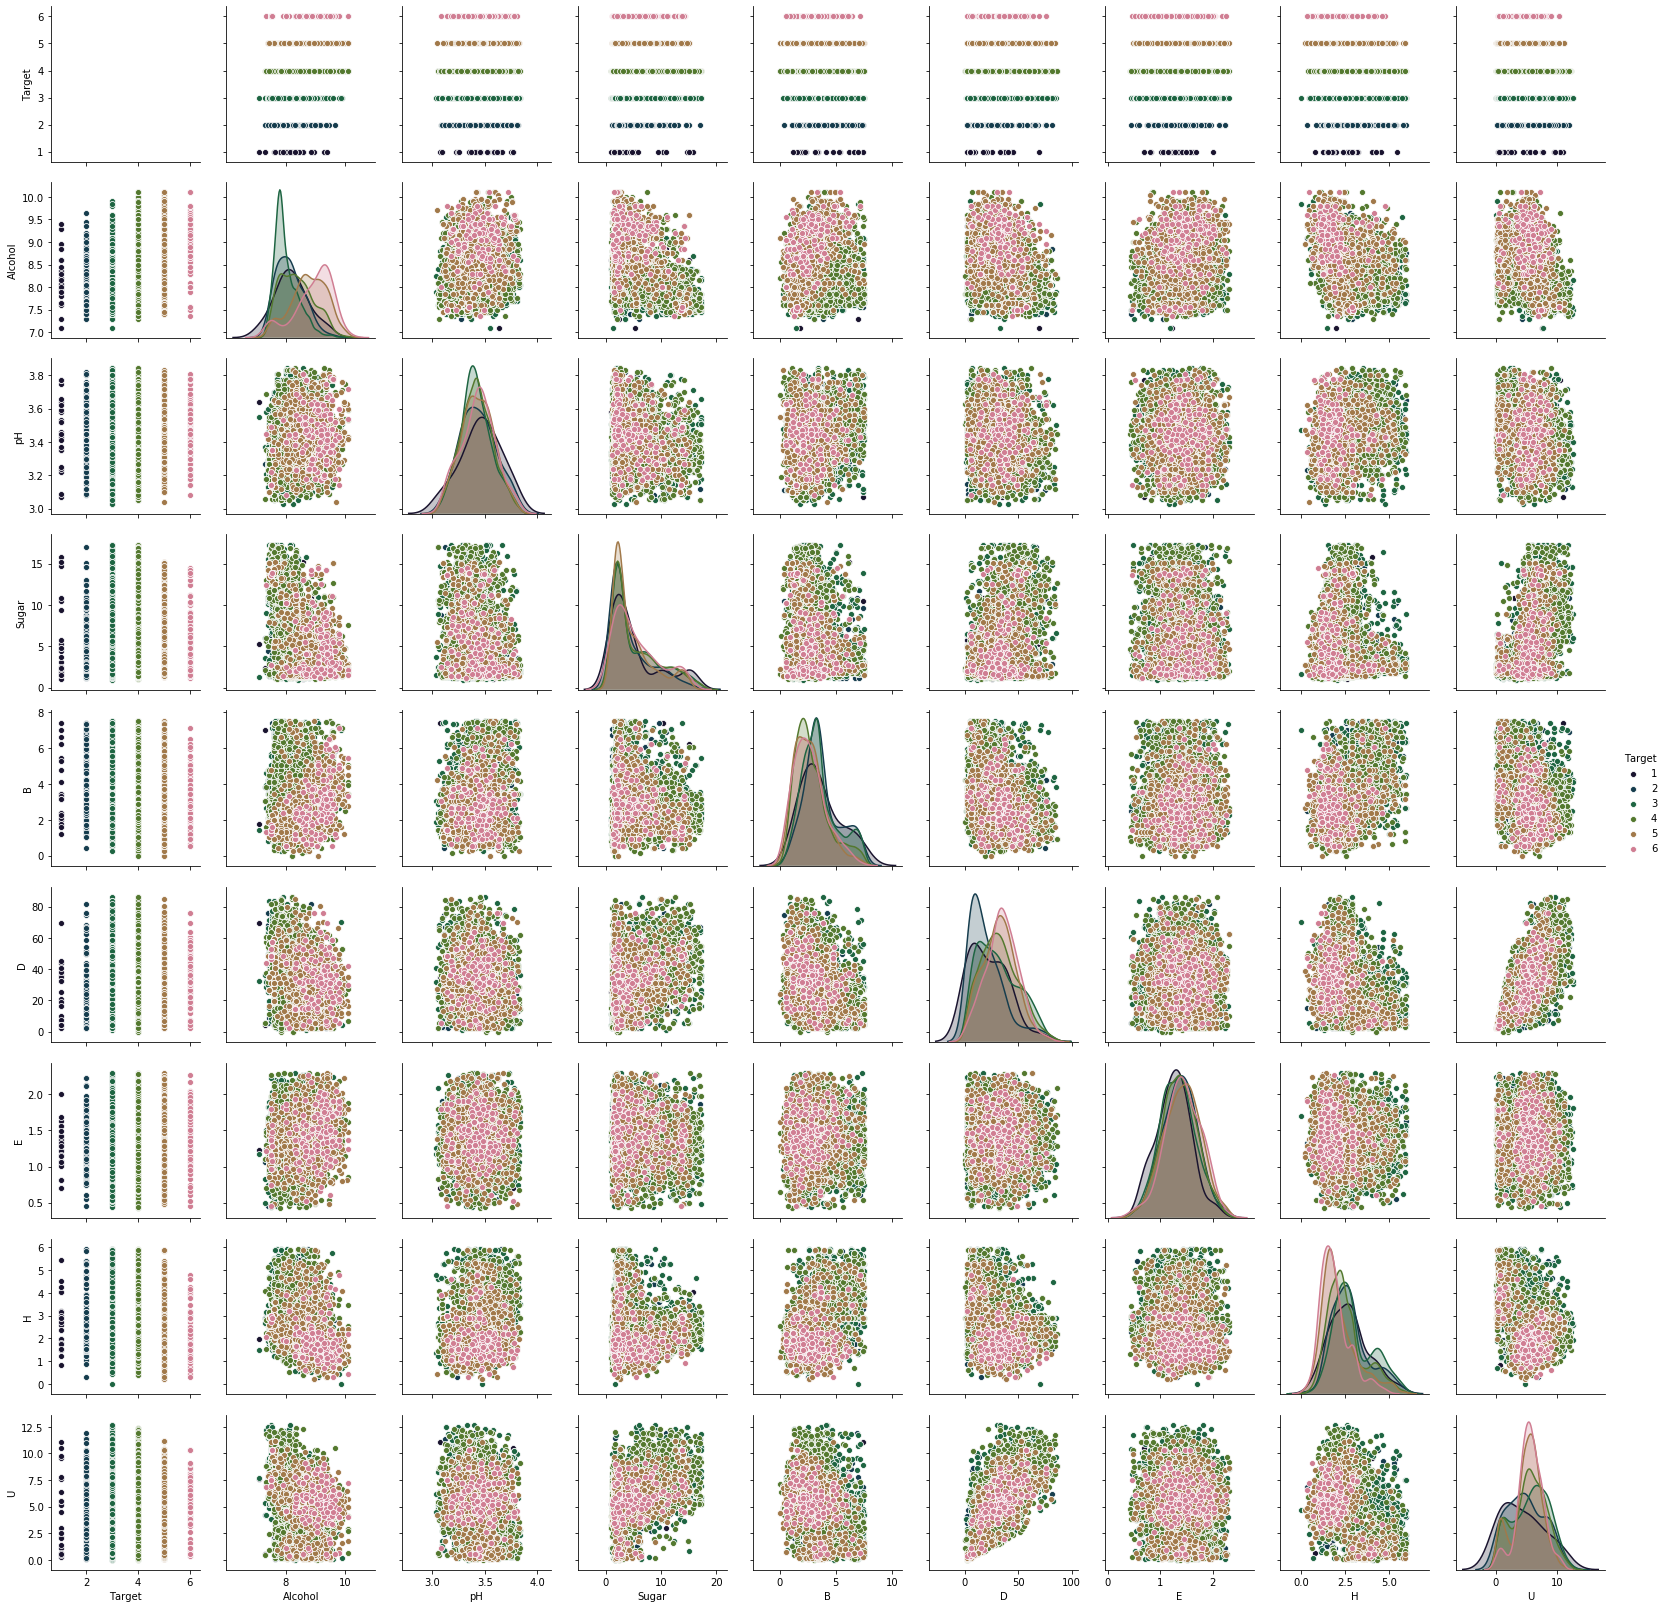

In [30]:
sns.pairplot(data, hue = 'Target', vars = feature_list)

E feature must be not included. Plotting kde shows the same distributions in various classes.

## Distribution data values by Target

In [31]:
# Show how Type depends with other features
data.groupby(['Target'])['Alcohol', 'pH', 'Sugar',
                         'B', 'D', 'H', 'U'].median().reset_index()

,Target,Alcohol,pH,Sugar,B,D,H,U
0,1,8.15,3.450000,3.15,3.421562,18.70,2.73,4.50
1,2,8.10,3.427979,2.58,3.421562,15.40,2.60,4.85
2,3,7.90,3.410000,3.25,3.300000,28.60,2.73,6.05
3,4,8.35,3.420000,3.44,2.510000,31.90,2.29,5.60
4,5,8.80,3.430000,3.06,2.510000,31.90,1.86,5.40
5,6,9.10,3.445000,4.34,2.510000,33.55,1.74,5.60


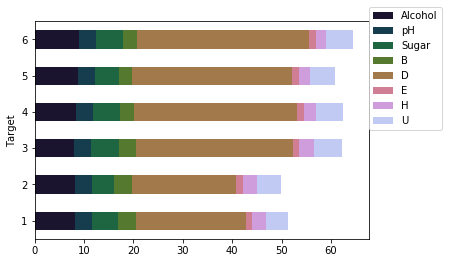

In [32]:
# Histogram distribution data values by Target
data_analysis.groupby('Target').aggregate(np.mean).plot(kind='barh', stacked=True)
plt.legend(loc=(1,0.5), fontsize = 'medium', markerscale=5)

Table and Plot Analysis shows that pH feature is almost constant. So pH feature may be unincluded. Also, the table helps understand data, for example, increasing Alcohol depends on Target Class.

## Shapiro–Wilk Test

In [33]:
# Shapiro–Wilk test 
def shapiro_test(my_data):
    shapiro = st.shapiro(my_data)
    alpha = 0.05
    print('Shapiro-Wilk Test',shapiro)
    if shapiro[1] > alpha:
        print('Gauss Distribution')
    else:
        print('Not Gauss distribution law')

In [34]:
# As H feature has null values replace it on mean for distribution fitting. 
data_analysis['H'] = data_analysis['H'].fillna(data_analysis['H'].mean())
# Other methods filling nan values will reconsider in next phase.

for feature in feature_list:
    shapiro_test(data_analysis[feature])
    print(feature, 'feature')

Shapiro-Wilk Test (0.8817131519317627, 0.0)
Not Gauss distribution law
Target feature
Shapiro-Wilk Test (0.9533452987670898, 5.5236368853770996e-39)
Not Gauss distribution law
Alcohol feature
Shapiro-Wilk Test (0.9948597550392151, 3.0056035785208657e-13)
Not Gauss distribution law
pH feature
Shapiro-Wilk Test (0.8401602506637573, 0.0)
Not Gauss distribution law
Sugar feature
Shapiro-Wilk Test (0.9365028738975525, 9.80908925027372e-44)
Not Gauss distribution law
B feature
Shapiro-Wilk Test (0.973450243473053, 5.0262939436923175e-31)
Not Gauss distribution law
D feature
Shapiro-Wilk Test (0.9983571171760559, 1.3530413525586482e-05)
Not Gauss distribution law
E feature
Shapiro-Wilk Test (0.9437929391860962, 8.007019425152005e-42)
Not Gauss distribution law
H feature
Shapiro-Wilk Test (0.981456458568573, 1.8757097033061854e-26)
Not Gauss distribution law
U feature


## Distribution law

Try fitting distribution law

In [35]:
def find_distribution(my_data):

        # Find and analysis the distribution law for numerical features

        dist_names = {'uniform', 'norm', 'lognorm', 'expon', 'beta',
                      'powerlaw', 'gamma', 'gengamma', 'loggamma', 'alpha',
                      'exponnorm', 'exponweib', 'exponpow',
                      'chi2', 'chi', 'nakagami','pareto', 'maxwell', 'logistic', 
                      'laplace', 'pearson3', 'powerlognorm', 'gennorm', 'truncnorm'}
        dist_results = []
        params = {}
        for dist_name in dist_names:
            dist = getattr(st, dist_name)
            param = dist.fit(my_data)
            params[dist_name] = param
            # applying the Kolmogorov-Smirnov test
            D, p = st.kstest(my_data, dist_name, args=param)
            dist_results.append((dist_name, p))
        # select the best fitted distribution
        best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
        fig, ax = plt.subplots()
        sns.distplot(my_data, bins=25, color='navy', ax=ax)
        plt.title('Best Fit Distribution: ' + str(best_dist))
        plt.ylabel('p - value = : ' + str(best_p))
        plt.show()
        return best_dist, best_p, params[best_dist]

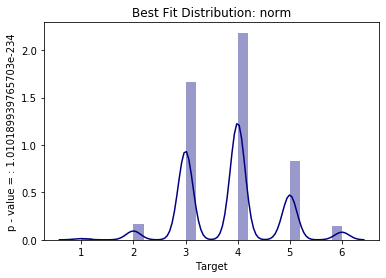

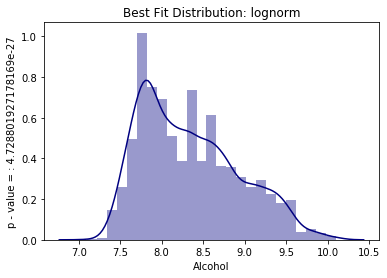

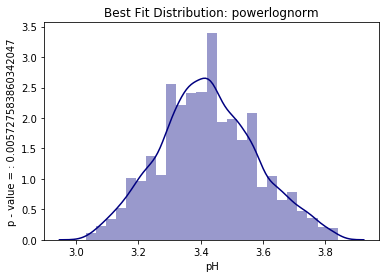

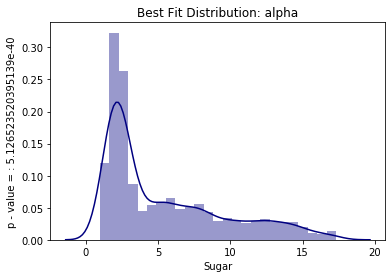

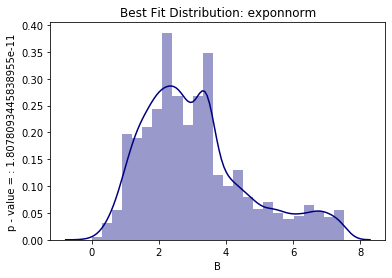

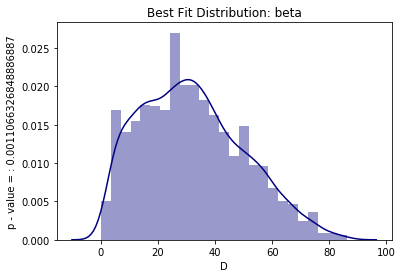

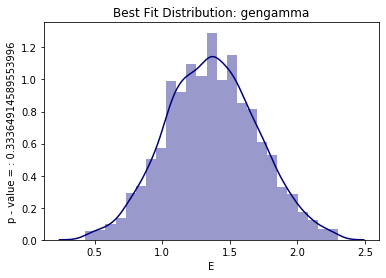

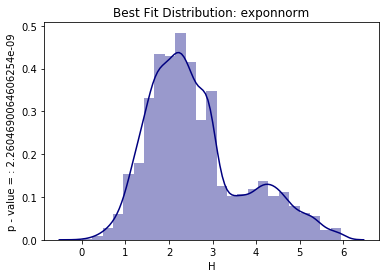

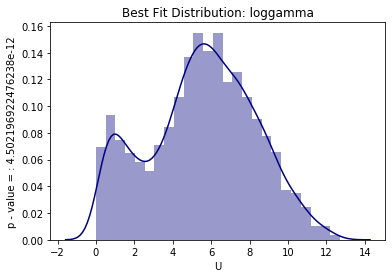

In [36]:
# Show distribution law and kde plot
for feature in feature_list:
    find_distribution(data_analysis[feature])

## Quantile-normal plots

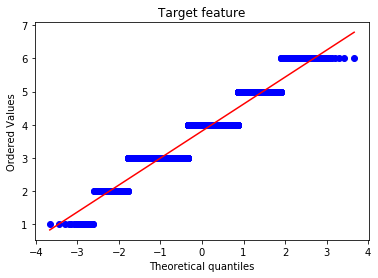

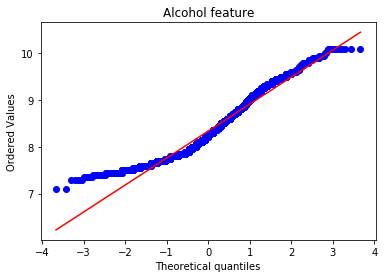

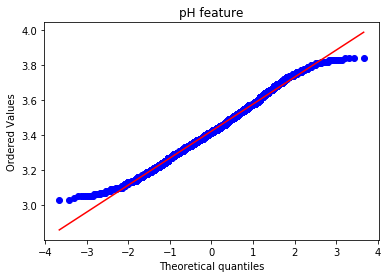

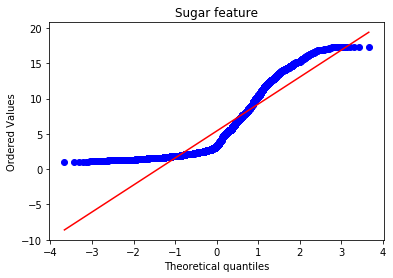

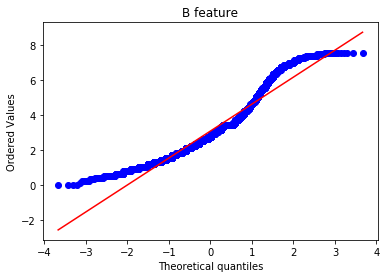

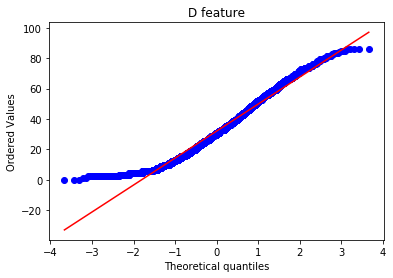

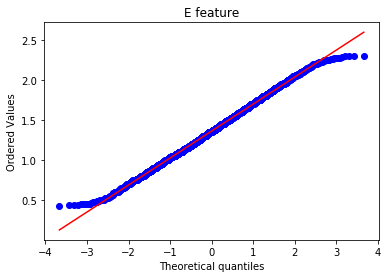

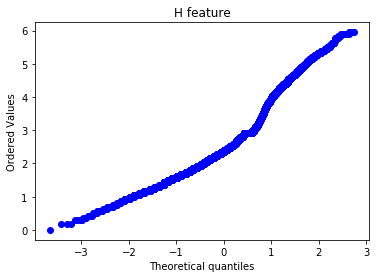

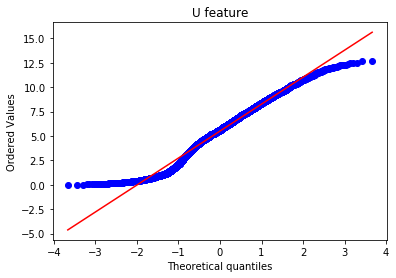

In [37]:
# Show Quantile-normal plots
for feature in feature_list:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    stats.probplot(data[feature], dist="norm", plot=pylab)
    ax.set_title(str(feature) + ' feature')
    pylab.show()

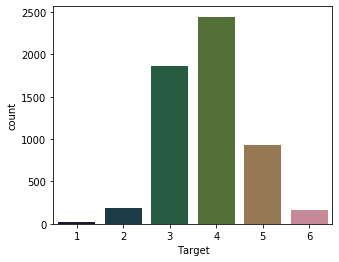

In [38]:
# Show count by Target
plt.figure(figsize=(5, 4))
sns.countplot(data['Target'])
plt.xticks(fontsize=10)
plt.show()

Visualisation shows that dataset is imbalanced

In [39]:
# Count population by Class
for i in range(1,7):
    print('Count population by Class ' + str(i) + ' =',len(data_analysis[data_analysis['Target']==i]['Alcohol']))

Count population by Class 1 = 25
Count population by Class 2 = 183
Count population by Class 3 = 1858
Count population by Class 4 = 2445
Count population by Class 5 = 931
Count population by Class 6 = 158


## ANOVA Test

In [40]:
# Apply ANOVA test for Alcohol
stat, p = f_oneway(data_analysis[data_analysis['Target'] == 1]['Alcohol'], data_analysis[data_analysis['Target'] == 2]['Alcohol'],
                   data_analysis[data_analysis['Target'] ==
                                 3]['Alcohol'], data_analysis[data_analysis['Target'] == 4]['Alcohol'],
                   data_analysis[data_analysis['Target'] == 5]['Alcohol'], data_analysis[data_analysis['Target'] == 6]['Alcohol'])
if p > 0.05:
    print('Groups have the same population mean', 'p - value = '+str(p))
else:
    print('Groups have`t the same population mean', 'p - value = '+str(p))

Groups have`t the same population mean p - value = 3.698719816895383e-305


Check ANOVA result. Show kde plot for evidence independent variables.

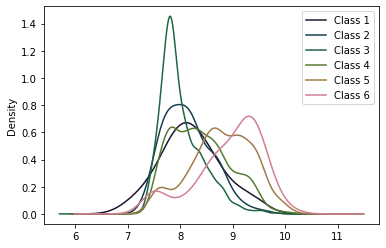

In [41]:
# Plotting kde visualisation for check ANOVA result for Alcohol feature
for i in range(1,7):
    data_analysis[data_analysis['Target']==i]['Alcohol'].plot(kind = 'kde', legend='1', label = 'Class '+str(i))

In [42]:
# Apply ANOVA test for Sugar
stat, p = f_oneway(data_analysis[data_analysis['Target']==1]['Sugar'], data_analysis[data_analysis['Target']==2]['Sugar'],
                   data_analysis[data_analysis['Target']==3]['Sugar'], data_analysis[data_analysis['Target']==4]['Sugar'],
                   data_analysis[data_analysis['Target']==5]['Sugar'], data_analysis[data_analysis['Target']==6]['Sugar'])
if p > 0.05:
    print('Groups have the same population mean', 'p - value = '+str(p))
else:
    print('Groups have`t the same population mean', 'p - value = '+str(p))

Groups have`t the same population mean p - value = 7.5572432761260894e-06


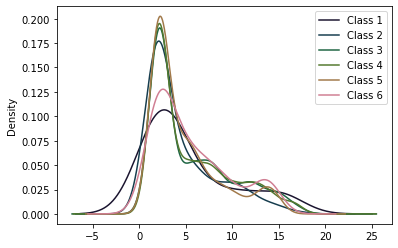

In [43]:
# Plotting kde visualisation for check ANOVA result for Sugar feature
for i in range(1,7):
    data_analysis[data_analysis['Target']==i]['Sugar'].plot(kind = 'kde', legend='1', label = 'Class '+str(i))

In [44]:
# Apply ANOVA test for B
stat, p = f_oneway(data_analysis[data_analysis['Target']==1]['B'], data_analysis[data_analysis['Target']==2]['B'],
                   data_analysis[data_analysis['Target']==3]['B'], data_analysis[data_analysis['Target']==4]['B'],
                   data_analysis[data_analysis['Target']==5]['B'], data_analysis[data_analysis['Target']==6]['B'])
if p > 0.05:
    print('Groups have the same population mean', 'p - value = '+str(p))
else:
    print('Groups have`t the same population mean', 'p - value = '+str(p))

Groups have`t the same population mean p - value = 2.601792385247723e-62


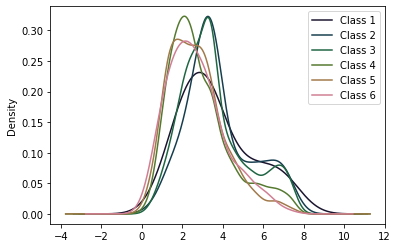

In [45]:
# Plotting kde visualisation for check ANOVA result for B feature
for i in range(1,7):
    data_analysis[data_analysis['Target']==i]['B'].plot(kind = 'kde', legend='1', label = 'Class '+str(i))

In [46]:
# Apply ANOVA test for D
stat, p = f_oneway(data_analysis[data_analysis['Target']==1]['D'], data_analysis[data_analysis['Target']==2]['D'],
                   data_analysis[data_analysis['Target']==3]['D'], data_analysis[data_analysis['Target']==4]['D'],
                   data_analysis[data_analysis['Target']==5]['D'], data_analysis[data_analysis['Target']==6]['D'])
if p > 0.05:
    print('Groups have the same population mean', 'p - value = '+str(p))
else:
    print('Groups have`t the same population mean', 'p - value = '+str(p))

Groups have`t the same population mean p - value = 3.1508133893021194e-17


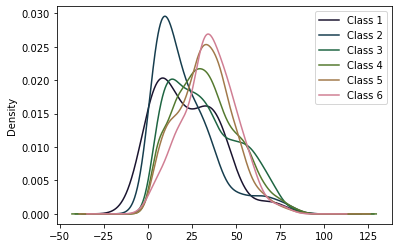

In [47]:
# Plotting kde visualisation for check ANOVA result for D feature
for i in range(1,7):
    data_analysis[data_analysis['Target']==i]['D'].plot(kind = 'kde', legend='1', label = 'Class '+str(i))

In [48]:
# Apply ANOVA test for H
stat, p = f_oneway(data_analysis[data_analysis['Target']==1]['H'], data_analysis[data_analysis['Target']==2]['H'],
                   data_analysis[data_analysis['Target']==3]['H'], data_analysis[data_analysis['Target']==4]['H'],
                   data_analysis[data_analysis['Target']==5]['H'], data_analysis[data_analysis['Target']==6]['H'])
if p > 0.05:
    print('Groups have the same population mean', 'p - value = '+str(p))
else:
    print('Groups have`t the same population mean', 'p - value = '+str(p))

Groups have`t the same population mean p - value = 7.466738491619381e-93


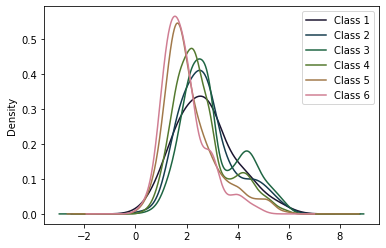

In [49]:
# Plotting kde visualisation for check ANOVA result for H feature
for i in range(1,7):
    data_analysis[data_analysis['Target']==i]['H'].plot(kind = 'kde', legend='1', label = 'Class '+str(i))

In [50]:
# Apply ANOVA test for U
stat, p = f_oneway(data_analysis[data_analysis['Target']==1]['U'], data_analysis[data_analysis['Target']==2]['U'],
                   data_analysis[data_analysis['Target']==3]['U'], data_analysis[data_analysis['Target']==4]['U'],
                   data_analysis[data_analysis['Target']==5]['U'], data_analysis[data_analysis['Target']==6]['U'])
if p > 0.05:
    print('Groups have the same population mean', 'p - value = '+str(p))
else:
    print('Groups have`t the same population mean', 'p - value = '+str(p))

Groups have`t the same population mean p - value = 5.7574877817615845e-08


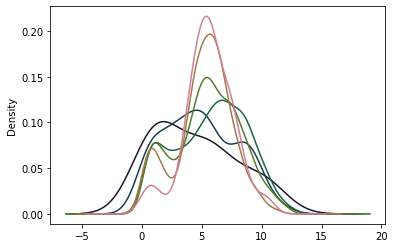

In [51]:
# Plotting kde visualisation for check ANOVA result for U feature
data_analysis[data_analysis['Target']==1]['U'].plot(kind = 'kde')
data_analysis[data_analysis['Target']==2]['U'].plot(kind = 'kde')
data_analysis[data_analysis['Target']==3]['U'].plot(kind = 'kde')
data_analysis[data_analysis['Target']==4]['U'].plot(kind = 'kde')
data_analysis[data_analysis['Target']==5]['U'].plot(kind = 'kde')
data_analysis[data_analysis['Target']==6]['U'].plot(kind = 'kde')

## Linear Regression

Linear models with independently and identically distributed errors, and for errors with heteroscedasticity or autocorrelation.




In [52]:
X_stat = data_analysis.drop(['Target'], axis=1)
y_stat = data_analysis['Target']

X_stat = sm.add_constant(X_stat)
est = sm.OLS(y_stat, X_stat.astype(float)).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     248.8
Date:                Mon, 09 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:29:53   Log-Likelihood:                -6274.7
No. Observations:                5600   AIC:                         1.257e+04
Df Residuals:                    5591   BIC:                         1.263e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1148      0.297     -7.119      0.000      -2.697      -1.532
Alcohol        0.6789      0.021     31.957      0.000       0.637       0.721
pH             0.1368      0.068      2.000      0.046       0.003       0.271
Sugar          0.0250      0.003      8.596      0.000       0.019       0.031
B             -0.0965      0.007    -13.427      0.000      -0.111      -0.082
D              0.0074      0.001      9.060      0.000       0.006       0.009
E              0.0063      0.030      0.208      0.835      -0.053       0.065
H             -0.0155      0.012     -1.297      0.195      -0.039       0.008
U             -0.0439      0.006     -7.514      0.000      -0.055      -0.032
==============================================================================
Omnibus:                       95.357   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.117
Skew:                          -0.021   Prob(JB):                     5.21e-42
Kurtosis:                       3.902   Cond. No.                     1.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

H feature may be unincluded.

## Chi Square Test

Find the relationship between two categorical variables Target and Type

In [53]:
for_chi2_table = pd.crosstab(data['Target'], data['Type'])
for_chi2_table

Type,red_wine,white_wine
Target,,
1,8,17
2,46,137
3,596,1262
4,538,1907
5,170,761
6,14,144


In [54]:
# Observed Values
observed_val = for_chi2_table.values 
# Expected Values

chi2_stat, p_val, dof, ex = stats.chi2_contingency(for_chi2_table)
critical_value = chi2.ppf(q = 1-0.05, df = dof)

In [55]:
# Compare chi_square_statistic with critical_value and 

if chi2_stat > critical_value:
    print("There is not a relationship between 2 categorical variables. Critical value = ", critical_value)
else:
    print("There is no relationship between 2 categorical variables. Critical value = ", critical_value)
    
# p-value which is the probability of getting chi-square > 0.09

if p_val < 0.05:
    print("There is not a relationship between 2 categorical variables. p-value = ", p_val)
else:
    print("There is no relationship between 2 categorical variables. p-value = ", p_val)

There is not a relationship between 2 categorical variables. Critical value =  11.070497693516351
There is not a relationship between 2 categorical variables. p-value =  1.600321723785794e-21


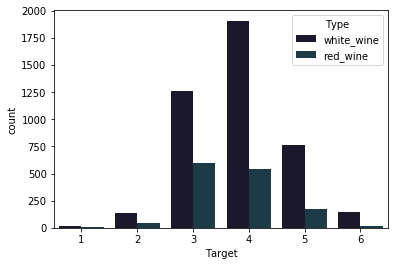

In [56]:
sns.countplot(x="Target", hue="Type", data = data)

Type feature may be unincluded.

## Plotting PCA visualisations

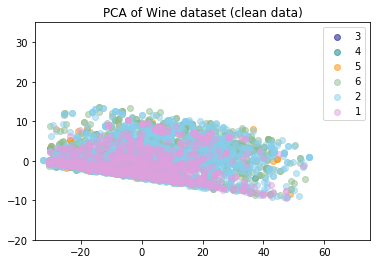

In [57]:
# Data for PCA visualisations
data_ = data.copy()
y_pca = data_['Target']
data_ = data_.drop(['Type', 'Target', 'Nitrogen', 'A', 'S',
                    'V', 'Density', 'C', 'Di', 'pH', 'E', 'H'], axis=1)
data_pca = data_.dropna(axis=1)

pca = PCA(n_components=2)
X_r = pca.fit(data_pca).transform(data_pca)

plt.figure()
colors = ['navy', 'teal', 'darkorange', 'darkseagreen', 'skyblue', 'plum']
target_class = data['Target'].unique()

for color, i, target_class in zip(colors, [0, 1, 2, 3, 4, 5], target_class):
    plt.scatter(X_r[y_pca == i, 0], X_r[y_pca == i, 1], color=color, alpha=.5,
                label=target_class)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlim([-35, 75])
plt.ylim([-20, 35])
plt.title('PCA of Wine dataset (clean data)')
plt.show()

Population not linear separability

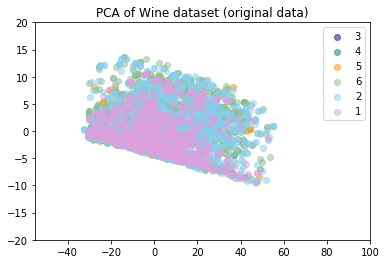

In [58]:
data_pca = data_pca.dropna(axis=1)
data_original = pca.fit(data_pca).transform(data_pca)

plt.figure()
colors = ['navy', 'teal', 'darkorange', 'darkseagreen', 'skyblue', 'plum']
target_class = y_pca.unique()

for color, i, target_class in zip(colors, [0, 1, 2, 3, 4, 5], target_class):
    plt.scatter(data_original[y_pca == i, 0], data_original[y_pca == i, 1], color=color, alpha=.5,
                label=target_class)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlim([-55, 100])
plt.ylim([-20, 20])
plt.title('PCA of Wine dataset (original data)')
plt.show()

Also Population not linear separability

Plotting PCA 3D visualisations

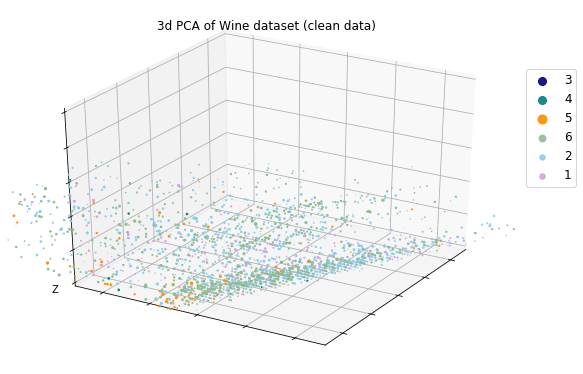

In [59]:
pca = PCA(n_components=3)
X_r = pca.fit(data_pca).transform(data_pca)

fig = plt.figure(figsize=(8, 5))
ax = Axes3D(fig, rect=[5, 8, .9, 1], elev=88, azim=334)
colors = ['navy', 'teal', 'darkorange', 'darkseagreen', 'skyblue', 'plum']
target_class = data['Target'].unique()

for color, i, target_class in zip(colors, [0, 1, 2, 3, 4, 5], target_class):
    plt.scatter(X_r[y_pca == i, 0], X_r[y_pca == i, 1], X_r[y_pca == i, 2], color=color, alpha=.9,
                label=target_class)
plt.legend(loc=(1, 0.5), fontsize='large', markerscale=8, shadow=False, scatterpoints=1)
ax.w_xaxis.set_ticklabels(['X'])
ax.w_yaxis.set_ticklabels(['Y'])
ax.w_zaxis.set_ticklabels(['Z'])
ax.view_init(30, 211)


plt.title('3d PCA of Wine dataset (clean data)')
plt.xlim([-15, 35])
plt.ylim([-5, 5])
ax.set_zlim(-1, 4)
plt.show()

Population not linear separability

# Data Preparation

## Deleting unimportant features

Deleting unimportant features. Convert categorical to binary data.

In [60]:
# Delete features with equivalent median for all Targets
data = data.drop(['Nitrogen', 'A', 'S', 'V'], axis=1)
# Delete features with equivalent median for all Targets after reboxplot
data = data.drop(['Density', 'C', 'E'], axis=1)
# Delete data with high correlation
data = data.drop(['Di'], axis=1)
# Delete pH feature after groupby
data = data.drop(['pH'], axis=1)
# Delete H feature after ANOVA
data = data.drop(['H'], axis=1)
# Delete Type feature after chi2 test
data = data.drop(['Type'], axis=1)

data_test = data_test.drop(['Type', 'Nitrogen', 'A', 'S', 'V', 'Density', 'C', 'Di', 'pH', 'E', 'H'], axis=1)

In [61]:
# Select X, y
X = data.drop(['Target'], axis=1)
y = data['Target']

## Standardization

In [62]:
# Scaler
scaler = StandardScaler().fit(X)
# Standartization X
X_sc = scaler.transform(X)

# Standartization test data
data_test_sc = scaler.transform(data_test)

## Sample separation

In [63]:
# Sample separation
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

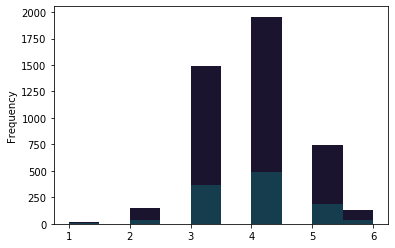

In [64]:
# Check hist for exclude mismatch in target data
a = y_train.value_counts()
y_train.plot(kind = 'hist')
y_test.plot(kind = 'hist')


# Modeling

## Baseline

Also, try to create baseline model with Alcohol feature. It helps understand we allow a mistake in feature selection or not.

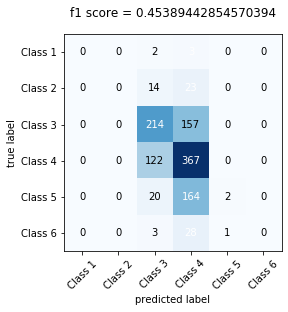

In [65]:
baseline_data = pd.DataFrame(data['Alcohol'])
X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(baseline_data, y, test_size=0.2,
                                                                                        random_state=42, stratify=y)
lr = LogisticRegression()
lr.fit(X_train_baseline, y_train_baseline)
y_pred_baseline = lr.predict(X_test_baseline)

# score
baseline_score = f1_score(y_test_baseline, y_pred_baseline, average='weighted')
# Confusion Matrix
cm_baseline = confusion_matrix(y_test_baseline, y_pred_baseline)

#  Plot Confusion Matrix
class_names = ['Class 1', 'Class 2',
               'Class 3', 'Class 4', 'Class 5', 'Class 6']
fig, ax = plot_confusion_matrix(conf_mat=cm_baseline, class_names=class_names)
plt.title('f1 score = ' + str(baseline_score))
plt.show()

## Modeling (standard methods)

In [66]:
def logist_regress_selection(X, y):
    #Choose best parameters for logist_regress modeling

    param_grid = {'C': [0.01, 0.1, 1, 5, 10, 15, 100], 'penalty': ['l1', 'l2']}
    grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid=param_grid)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

print('Logistic Regression:', logist_regress_selection(X_train, y_train))

Logistic Regression: {'C': 1, 'penalty': 'l1'}


In [67]:
def KNeighbors_selection(X, y):
    #Choose best parameters for KNN modeling

    param_grid = {'n_neighbors': [3, 5, 10, 20, 50],
                  'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                  'p': [1, 2]}
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

print('KNeighbors:', KNeighbors_selection(X_train, y_train))

KNeighbors: {'algorithm': 'auto', 'n_neighbors': 20, 'p': 1}


In [68]:
def svc_param_selection(X, y):
    #Choose best parameters for SVM modeling

    param_grid = {'C': [0.01, 0.1, 1],
                  'gamma': [0.01, 0.1, 1]}
    grid_search = GridSearchCV(SVC(kernel='rbf', random_state=42), param_grid=param_grid)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

print('SVM:', svc_param_selection(X_train, y_train))

SVM: {'C': 1, 'gamma': 1}


In [69]:
def randomforest_param_selection(X, y):
    #Choose best parameters for Random Forest modeling

    param_grid = {'max_depth': [50, 80, 100],
                  'max_features': [2, 4, 5],
                  'n_estimators': [10, 100, 300]}
    grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

print('Random Forest', randomforest_param_selection(X_train, y_train))

Random Forest {'max_depth': 50, 'max_features': 2, 'n_estimators': 300}


In [70]:
def boosting_param_selection(X, y):
    #Choose best parameters for Gradient Boosting modeling
    param_grid = {'n_estimators': [10, 100, 300],
                  'learning_rate': [0.1, 0.05, 0.01],
                  'max_depth': [50, 80, 100]}
    grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid=param_grid)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

print('Gradient Boosting', boosting_param_selection(X_train, y_train))

Gradient Boosting {'learning_rate': 0.1, 'max_depth': 50, 'n_estimators': 100}


In [71]:
# Modeling with best parameters
log_regress = LogisticRegression(C=1, penalty='l1')
knn = KNeighborsClassifier(n_neighbors=20, algorithm='auto', p=1)
svm = SVC(C=1, gamma=1)
random_forest = RandomForestClassifier(
    max_depth=50, n_estimators=300, max_features=2)
gradient_boosting = GradientBoostingClassifier(
    learning_rate=0.1, max_depth=50, n_estimators=100)

In [72]:
def cross_val(model, X, y):
    #Find cross-validation score with f1 scoring

    cross_valid = cross_val_score(model, X, y, cv=5, scoring='f1_weighted')
    cross_valid = np.mean(cross_valid)
    return cross_valid

In [73]:
# Calculate f1 score
log_regress_f1 = cross_val(log_regress, X_train, y_train)
knn_f1 = cross_val(knn, X_train, y_train)
svm_f1 = cross_val(svm, X_train, y_train)
random_forest_f1 = cross_val(random_forest, X_train, y_train)
gradient_boosting_f1 = cross_val(gradient_boosting, X_train, y_train)

## Comparing Models

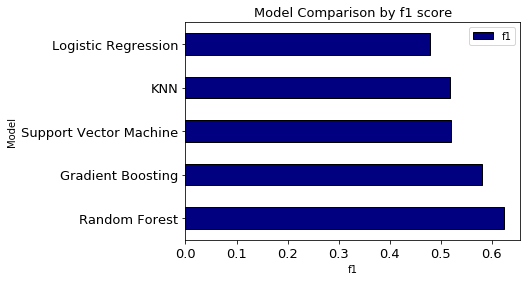

In [74]:
# Dataframe to hold the results
model_comparison = pd.DataFrame({'Model': ['Logistic Regression', 'KNN', 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosting'],
                                 'f1': [log_regress_f1, knn_f1, svm_f1, 
                                        random_forest_f1, gradient_boosting_f1]})
model_comparison.sort_values('f1', ascending=False).plot(x='Model', y='f1', 
                                                         kind='barh', edgecolor='black', 
                                                         color='navy')
# Show best model
plt.yticks(size=13)
plt.xlabel('f1')
plt.xticks(size=13)
plt.title('Model Comparison by f1 score', size=13)
plt.show()

Random Forest Model is the best model

## Calculate score and plot Confusion Matrix

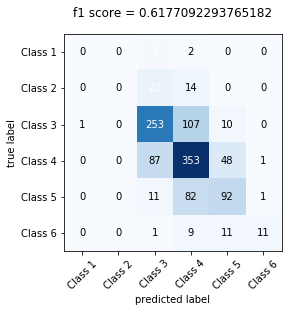

In [75]:
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

# score
rf_score = f1_score(y_test, y_pred_rf, average='weighted')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

#  Plot Confusion Matrix
class_names = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6']
fig, ax = plot_confusion_matrix(conf_mat=cm_rf, class_names=class_names)
plt.title('f1 score = '+ str(rf_score))
plt.show()

The confusion matrix shows that the predicted labels do not have first class.

So will try to understand why the model does not predict first class.

In [76]:
# Collect data to DataFrame
y_pred_rf = pd.Series(y_pred_rf)
X_test = pd.DataFrame(X_test, columns=['Alcohol', 'Sugar', 'B', 'D', 'U'])
y_test = y_test.reset_index(drop=True)
classes = pd.DataFrame.from_dict({'y_test': y_test, 'y_pred_rf': y_pred_rf})
analysis_class = pd.concat([X_test, classes], axis=1)

In [77]:
first_class = analysis_class[analysis_class['y_test'] == 1]
first_class

,Alcohol,Sugar,B,D,U,y_test,y_pred_rf
289,-0.231753,0.102290,0.208149,-1.656376,-1.830130,1,3
335,0.446159,-0.742842,1.459772,0.033321,0.006492,1,4
483,-1.163883,1.218729,2.706083,0.177308,1.992707,1,3
665,-1.163883,-0.149809,0.049803,-1.350762,0.323581,1,3
952,0.446159,2.347173,1.957037,0.330115,0.006492,1,4


In [78]:
# Apply ANOVA test for data with true label = 1 and  and 
# data with true label = 3
stat_, p_ = f_oneway(analysis_class[analysis_class['y_test']==1], 
                     analysis_class[analysis_class['y_test']==3])
p_

array([0.645365  , 0.25108189, 0.02733475, 0.27947983, 0.93725862,
       0.        , 0.7963775 ])

In [79]:
# Apply ANOVA test for data with true label = 1 and  and 
# data with true label = 3
stat_, p_ = f_oneway(analysis_class[analysis_class['y_test']==1], 
                     analysis_class[analysis_class['y_test']==4])
p_

array([2.96708120e-01, 2.26159634e-01, 4.54733250e-04, 2.21656893e-01,
       8.64236130e-01, 0.00000000e+00, 2.77495569e-02])

ANOVA test shows a significant relation. So the first and third classes, first class and fourth classes have a relation by several features. 

In [80]:
# Apply ANOVA test for data with true label = 4 and  and 
# data with true label = 3
stat_, p_ = f_oneway(analysis_class[analysis_class['y_test']==3], 
                     analysis_class[analysis_class['y_test']==4])
p_

array([1.50669133e-22, 9.99738239e-01, 1.11360571e-11, 9.39953708e-01,
       1.06438639e-01,            nan, 2.00919149e-50])

The fourth and third classes have relation by several features. 

In [81]:
stat_all, p_all = f_oneway(analysis_class[analysis_class['y_test']==1],
                           analysis_class[analysis_class['y_test']==2],
                           analysis_class[analysis_class['y_test']==3],
                           analysis_class[analysis_class['y_test']==4],
                           analysis_class[analysis_class['y_test']==5], 
                           analysis_class[analysis_class['y_test']==6])
p_all

array([1.24059667e-051, 6.88535344e-003, 3.98085734e-014, 1.90575741e-005,
       1.94720453e-004, 0.00000000e+000, 1.60514650e-114])

Summary: separated data with different labels, such as data with true label = 1 and data with true label = 3 has a high similar for some features. So, I can say that data especial first class needs an extension.



Since we could not predict the first class by reason of relations with third and fourth classes we will ameliorate score prediction for third and fourth classes.

In [82]:
third_class = analysis_class[analysis_class['y_test']==3]
third_class.groupby(['y_test','y_pred_rf'])['Alcohol', 'Sugar', 'B', 'D', 'U'].median().reset_index()

,y_test,y_pred_rf,Alcohol,Sugar,B,D,U
0,3,1,-0.824927,-0.891701,-0.535586,0.024501,1.831179
1,3,3,-0.824927,-0.538762,0.208149,-0.067183,0.395372
2,3,4,-0.062275,-0.514752,-0.365634,-0.067183,0.144105
3,3,5,1.124072,-0.652807,-0.157916,-0.525604,-0.376375


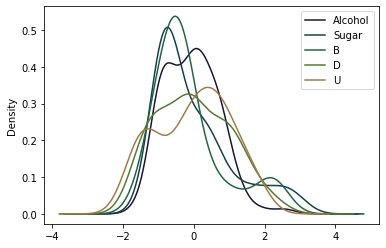

In [83]:
class3_4 = analysis_class[analysis_class['y_test']==3][analysis_class['y_pred_rf']==4]
class_3_4 = class3_4.drop(['y_test', 'y_pred_rf'], axis=1)
class_3_4.plot(kind = 'kde')

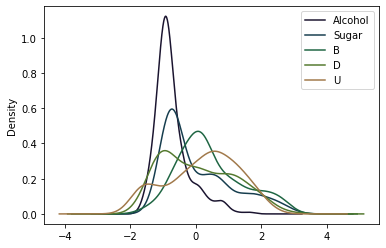

In [84]:
class3_3 = analysis_class[analysis_class['y_test']==3][analysis_class['y_pred_rf']==3]
class_3_3 = class3_3.drop(['y_test', 'y_pred_rf'], axis=1)
class_3_3.plot(kind = 'kde')

In [85]:
# Apply ANOVA test for data with true label = 3 and predicted label = 4 (class3_4) and 
# data with true label = 3 and predicted label = 3 (class3_3)
stat3_4, p3_4 = f_oneway(class_3_3, class_3_4)
p3_4

array([3.14613866e-19, 7.58485710e-01, 1.60603389e-06, 6.86323310e-01,
       5.72861867e-02])

Features Sugar, D has a highly similar.

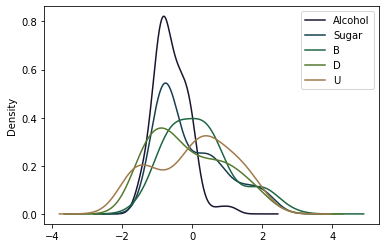

In [86]:
class4_3 = analysis_class[analysis_class['y_test']==4][analysis_class['y_pred_rf']==3]
class_4_3 = class4_3.drop(['y_test', 'y_pred_rf'], axis=1)
class_4_3.plot(kind = 'kde')

In [87]:
stat4_3, p4_3 = f_oneway(class_4_3, class_3_4)
p4_3

array([2.98796451e-08, 7.23057659e-01, 2.12199199e-02, 4.01678640e-01,
       6.90686914e-01])

Features Sugar, D, U has highly similar. So try modeling without U, Sugar, D

In [88]:
data_new = data.drop(['Target', 'Sugar', 'D', 'U'], axis=1)
# Scaler
scaler = StandardScaler().fit(data_new)
# Standartization X
data_sc_new = scaler.transform(data_new)
# Sample separation
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(data_sc_new, y, test_size=0.2, 
                                                                    random_state=42, stratify=y)

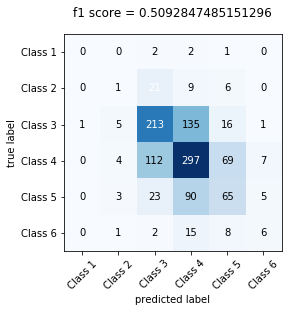

In [89]:
random_forest.fit(X_train_new, y_train_new)
y_pred_new = random_forest.predict(X_test_new)

# score
rf_score_new = f1_score(y_test_new, y_pred_new, average='weighted')

# Confusion Matrix
cm_rf_new = confusion_matrix(y_test_new, y_pred_new)

#  Plot Confusion Matrix
class_names = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6']
fig, ax = plot_confusion_matrix(conf_mat=cm_rf_new, class_names=class_names)
plt.title('f1 score = '+ str(rf_score_new))
plt.show()

After deleting the score is reduced.
So try modeling without U.

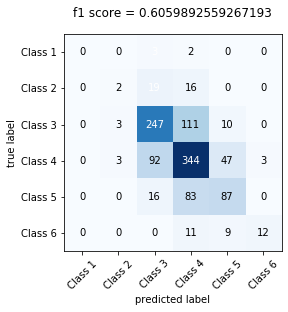

In [90]:
data_new = data.drop(['Target', 'U'], axis=1)
# Scaler
scaler = StandardScaler().fit(data_new)
# Standartization X
data_sc_new = scaler.transform(data_new)
# Sample separation
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(data_sc_new, y, test_size=0.2, 
                                                                    random_state=42, stratify=y)
random_forest.fit(X_train_new, y_train_new)
y_pred_new = random_forest.predict(X_test_new)

# score
rf_score_new = f1_score(y_test_new, y_pred_new, average='weighted')

# Confusion Matrix
cm_rf_new = confusion_matrix(y_test_new, y_pred_new)

#  Plot Confusion Matrix
class_names = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6']
fig, ax = plot_confusion_matrix(conf_mat=cm_rf_new, class_names=class_names)
plt.title('f1 score = '+ str(rf_score_new))
plt.show()

Try modeling without Sugar.

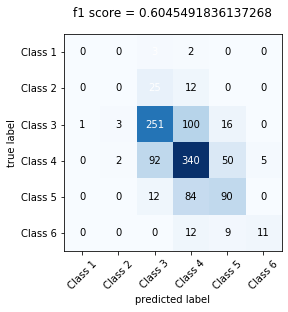

In [91]:
data_new = data.drop(['Target', 'Sugar'], axis=1)
# Scaler
scaler = StandardScaler().fit(data_new)
# Standartization X
data_sc_new = scaler.transform(data_new)
# Sample separation
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(data_sc_new, y, test_size=0.2, 
                                                                    random_state=42, stratify=y)
random_forest.fit(X_train_new, y_train_new)
y_pred_new = random_forest.predict(X_test_new)

# score
rf_score_new = f1_score(y_test_new, y_pred_new, average='weighted')

# Confusion Matrix
cm_rf_new = confusion_matrix(y_test_new, y_pred_new)

#  Plot Confusion Matrix
class_names = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6']
fig, ax = plot_confusion_matrix(conf_mat=cm_rf_new, class_names=class_names)
plt.title('f1 score = '+ str(rf_score_new))
plt.show()

Try modeling without D.

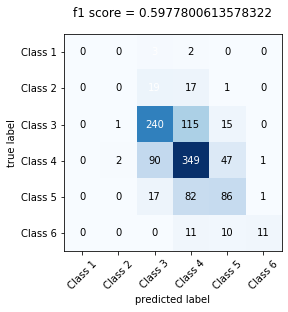

In [92]:
data_new = data.drop(['Target', 'D'], axis=1)
# Scaler
scaler = StandardScaler().fit(data_new)
# Standartization X
data_sc_new = scaler.transform(data_new)
# Sample separation
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(data_sc_new, y, test_size=0.2, 
                                                                    random_state=42, stratify=y)
random_forest.fit(X_train_new, y_train_new)
y_pred_new = random_forest.predict(X_test_new)

# score
rf_score_new = f1_score(y_test_new, y_pred_new, average='weighted')

# Confusion Matrix
cm_rf_new = confusion_matrix(y_test_new, y_pred_new)

#  Plot Confusion Matrix
class_names = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6']
fig, ax = plot_confusion_matrix(conf_mat=cm_rf_new, class_names=class_names)
plt.title('f1 score = '+ str(rf_score_new))
plt.show()

Deleting feature do not help a  reduce errors in confusion matrix for third and fourth classes.

## Extended parameters grid by RandomizedSearchCV

Try extended parameters grid

In [93]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 600, stop = 2000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 90, num = 11)]
max_features = [int(x) for x in np.linspace(1, 5, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 4, 5, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
# specify parameters and distributions to sample from
param_dist = {'n_estimators': n_estimators,
              "max_depth": max_depth,
              "max_features": max_features,
              "min_samples_split": min_samples_split,
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
pprint(param_dist)

{'bootstrap': [True, False],
 'criterion': ['gini', 'entropy'],
 'max_depth': [10, 18, 26, 34, 42, 50, 58, 66, 74, 82, 90, None],
 'max_features': [1, 2, 3, 4, 5],
 'min_samples_split': [2, 4, 5, 10],
 'n_estimators': [600, 755, 911, 1066, 1222, 1377, 1533, 1688, 1844, 2000]}


In [94]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_dist, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] n_estimators=600, min_samples_split=10, max_features=2, max_depth=10, criterion=entropy, bootstrap=False 


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=600, min_samples_split=10, max_features=2, max_depth=10, criterion=entropy, bootstrap=False, total=   2.7s
[CV] n_estimators=600, min_samples_split=10, max_features=2, max_depth=10, criterion=entropy, bootstrap=False 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=10, max_features=2, max_depth=10, criterion=entropy, bootstrap=False, total=   2.8s
[CV] n_estimators=600, min_samples_split=10, max_features=2, max_depth=10, criterion=entropy, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=10, max_features=2, max_depth=10, criterion=entropy, bootstrap=False, total=   2.8s
[CV] n_estimators=600, min_samples_split=5, max_features=2, max_depth=42, criterion=gini, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=5, max_features=2, max_depth=42, criterion=gini, bootstrap=True, total=   1.6s
[CV] n_estimators=600, min_samples_split=5, max_features=2, max_depth=42, criterion=gini, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=5, max_features=2, max_depth=42, criterion=gini, bootstrap=True, total=   1.6s
[CV] n_estimators=600, min_samples_split=5, max_features=2, max_depth=42, criterion=gini, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=5, max_features=2, max_depth=42, cr

[CV]  n_estimators=2000, min_samples_split=5, max_features=4, max_depth=90, criterion=gini, bootstrap=False, total=  11.5s
[CV] n_estimators=2000, min_samples_split=5, max_features=4, max_depth=90, criterion=gini, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=5, max_features=4, max_depth=90, criterion=gini, bootstrap=False, total=  12.0s
[CV] n_estimators=1066, min_samples_split=10, max_features=1, max_depth=10, criterion=entropy, bootstrap=True 
[CV]  n_estimators=1066, min_samples_split=10, max_features=1, max_depth=10, criterion=entropy, bootstrap=True, total=   2.3s
[CV] n_estimators=1066, min_samples_split=10, max_features=1, max_depth=10, criterion=entropy, bootstrap=True 
[CV]  n_estimators=1066, min_samples_split=10, max_features=1, max_depth=10, criterion=entropy, bootstrap=True, total=   2.2s
[CV] n_estimators=1066, min_samples_split=10, max_features=1, max_depth=10, criterion=entropy, bootstrap=True 
[CV]  n_estimators=1066, min_samples_split=10, max_features=1

[CV]  n_estimators=2000, min_samples_split=2, max_features=2, max_depth=34, criterion=entropy, bootstrap=False, total=  13.6s
[CV] n_estimators=2000, min_samples_split=2, max_features=2, max_depth=34, criterion=entropy, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=2, max_features=2, max_depth=34, criterion=entropy, bootstrap=False, total=  13.5s
[CV] n_estimators=1688, min_samples_split=2, max_features=2, max_depth=90, criterion=gini, bootstrap=True 
[CV]  n_estimators=1688, min_samples_split=2, max_features=2, max_depth=90, criterion=gini, bootstrap=True, total=   4.5s
[CV] n_estimators=1688, min_samples_split=2, max_features=2, max_depth=90, criterion=gini, bootstrap=True 
[CV]  n_estimators=1688, min_samples_split=2, max_features=2, max_depth=90, criterion=gini, bootstrap=True, total=   4.5s
[CV] n_estimators=1688, min_samples_split=2, max_features=2, max_depth=90, criterion=gini, bootstrap=True 
[CV]  n_estimators=1688, min_samples_split=2, max_features=2, max_depth=

[CV]  n_estimators=1533, min_samples_split=10, max_features=4, max_depth=50, criterion=entropy, bootstrap=True, total=  11.1s
[CV] n_estimators=1533, min_samples_split=10, max_features=4, max_depth=50, criterion=entropy, bootstrap=True 
[CV]  n_estimators=1533, min_samples_split=10, max_features=4, max_depth=50, criterion=entropy, bootstrap=True, total=  10.6s
[CV] n_estimators=600, min_samples_split=4, max_features=3, max_depth=66, criterion=entropy, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=4, max_features=3, max_depth=66, criterion=entropy, bootstrap=True, total=   3.5s
[CV] n_estimators=600, min_samples_split=4, max_features=3, max_depth=66, criterion=entropy, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=4, max_features=3, max_depth=66, criterion=entropy, bootstrap=True, total=   3.6s
[CV] n_estimators=600, min_samples_split=4, max_features=3, max_depth=66, criterion=entropy, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=4, max_features=3, m

[CV]  n_estimators=2000, min_samples_split=4, max_features=3, max_depth=None, criterion=gini, bootstrap=False, total=   9.4s
[CV] n_estimators=2000, min_samples_split=4, max_features=3, max_depth=None, criterion=gini, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=4, max_features=3, max_depth=None, criterion=gini, bootstrap=False, total=   9.4s
[CV] n_estimators=2000, min_samples_split=4, max_features=3, max_depth=None, criterion=gini, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=4, max_features=3, max_depth=None, criterion=gini, bootstrap=False, total=   9.4s
[CV] n_estimators=1377, min_samples_split=4, max_features=5, max_depth=34, criterion=gini, bootstrap=True 
[CV]  n_estimators=1377, min_samples_split=4, max_features=5, max_depth=34, criterion=gini, bootstrap=True, total=   6.5s
[CV] n_estimators=1377, min_samples_split=4, max_features=5, max_depth=34, criterion=gini, bootstrap=True 
[CV]  n_estimators=1377, min_samples_split=4, max_features=5, max_dep

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 18.7min finished


{'n_estimators': 911,
 'min_samples_split': 4,
 'max_features': 1,
 'max_depth': 18,
 'criterion': 'entropy',
 'bootstrap': True}

In [95]:
random_forest_extendet = RandomForestClassifier(n_estimators=911, min_samples_split=4,
                                                max_features=1, max_depth=18,
                                                criterion='entropy', bootstrap=True)

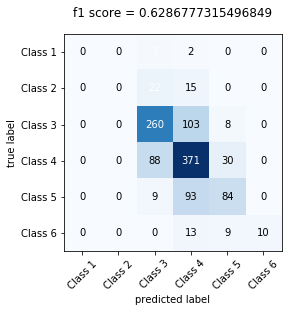

In [96]:
random_forest_extendet.fit(X_train, y_train)
y_pred_rf_ex = random_forest_extendet.predict(X_test)

# score
rf_ex_score = f1_score(y_test, y_pred_rf_ex, average='weighted')

# Confusion Matrix
cm_rf_ex = confusion_matrix(y_test, y_pred_rf_ex)

#  Plot Confusion Matrix
class_names = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6']
fig, ax = plot_confusion_matrix(conf_mat = cm_rf_ex, class_names=class_names)
plt.title('f1 score = '+ str(rf_ex_score))
plt.show()

The extended parameter grid helps increase the score.

## Modeling for imbalanced classes

In [97]:
# Separations data on trait, test
X_tr_imbal, X_te_imbal, y_tr_imbal, y_te_imbal = train_test_split(X_sc, y, test_size=0.2, 
                                                                  random_state=42, stratify=y)

In [98]:
# Method based on using SMOTE and cleaning using Tomek links.
sm = SMOTETomek()
X_SMOTET, y_SMOTET = sm.fit_sample(X_tr_imbal, y_tr_imbal)

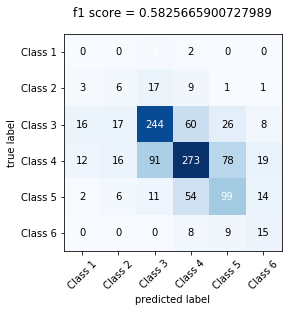

In [99]:
random_forest_extendet.fit(X_SMOTET, y_SMOTET)
y_pred_SMOTET = random_forest_extendet.predict(X_te_imbal)

# score
SMOTET_score = f1_score(y_test, y_pred_SMOTET, average='weighted')

# Confusion Matrix
cm_SMOTET = confusion_matrix(y_test, y_pred_SMOTET)

#  Plot Confusion Matrix
class_names = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6']
fig, ax = plot_confusion_matrix(conf_mat = cm_SMOTET, class_names=class_names)
plt.title('f1 score = '+ str(SMOTET_score))
plt.show()

SMOTET Method does not help to increase the score.

In [100]:
# Method based on one-sided selection method.
oss = OneSidedSelection(return_indices=True)
X_resampled, y_resampled, idx_resampled = oss.fit_sample(X_tr_imbal, y_tr_imbal)

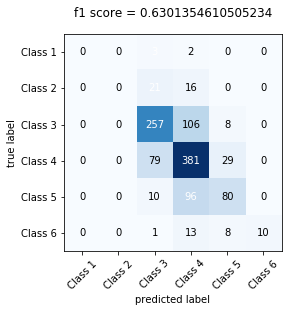

In [101]:
random_forest_extendet.fit(X_tr_imbal, y_tr_imbal)
y_pred_OSS = random_forest_extendet.predict(X_te_imbal)

# score
OSS_score = f1_score(y_test, y_pred_OSS, average='weighted')

# Confusion Matrix
cm_OSS = confusion_matrix(y_test, y_pred_OSS)

#  Plot Confusion Matrix
class_names = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6']
fig, ax = plot_confusion_matrix(conf_mat = cm_OSS, class_names=class_names)
plt.title('f1 score = '+ str(OSS_score))
plt.show()

Comparing several methods for modeling shows that the higher score is the Random Forest + OneSidedSelection with extended parameters grid by RandomizedSearchCV. Methods such as SMOTET can not increase the score, but has predictions in first class.
For example, Synthetic Minority Over-sampling Technique shows the score - 0.58, One-Sided Selection method - 0.63, Random Forest - 0.61, and Random Forest with  with extended parameters grid by RandomizedSearchCV - 0.62.

In [102]:
# Prediction Target for the best Model - Random Forest + OneSidedSelection
predictions_forest = random_forest_extendet.predict(data_test_sc)
predictions_forest = pd.DataFrame(predictions_forest, columns=['Target'], 
                                        index=pd.RangeIndex(start=5600, stop=6390, step=1))

In [103]:
predictions_forest['Target'].value_counts()

4    416
3    259
5     96
6     13
2      6
Name: Target, dtype: int64

Try to combine six in three classes: first class concludes 1 and 2 classes, second class - 3 and 4, third class is 5 and 6. 

In [104]:
y_new_class = y.map(lambda types: 1 if types == 1 and 2 else (2 if types == 3 and 4 else 3))

In [105]:
# Separations data on trait, test
X_tr_new, X_te_new, y_tr_new, y_te_new = train_test_split(X_sc, y_new_class, test_size=0.2, random_state=42, stratify=y)
# Method based on one-sided selection method.
X_res_new, y_res_new, idx_res_new = oss.fit_sample(X_tr_new, y_tr_new)

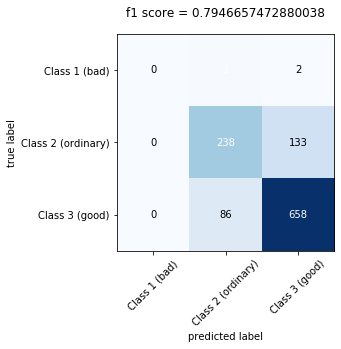

In [106]:
new_randomf = random_forest_extendet.fit(X_tr_new, y_tr_new)
y_pred_new = new_randomf.predict(X_te_new)

# score
OSS_score = f1_score(y_te_new, y_pred_new, average='weighted')

# Confusion Matrix
cm_new = confusion_matrix(y_te_new, y_pred_new)

#  Plot Confusion Matrix
class_names = ['Class 1 (bad)', 'Class 2 (ordinary)', 'Class 3 (good)']
fig, ax = plot_confusion_matrix(conf_mat=cm_new, class_names=class_names)
plt.title('f1 score = ' + str(OSS_score))
plt.show()

In [107]:
print(classification_report(y_te_new, y_pred_new))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.73      0.64      0.68       371
           3       0.83      0.88      0.86       744

    accuracy                           0.80      1120
   macro avg       0.52      0.51      0.51      1120
weighted avg       0.79      0.80      0.79      1120



# Evaluation

Was done: research and analysis data, building models, evaluated scores, proposed to resampling methods, compared models, selected the best model, prediction.

The general problem is imbalanced classes. The first class had 25 samples when the third had 2445 samples so the model does not predict the first class. 

Also, data has a problem - similar data for class label 3 and 4. This lead to missing label 1 in predicted classes. Renewal dataset with extension first class could help increase the score.

Until the data is updated the best model is Random Forest + One Side Selection.